# Visual Data Analysis part2

## Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set()
plt.rcParams["figure.figsize"]=(8, 5)
plt.rcParams["image.cmap"]="viridis"

In [6]:
DATA_PATH = "/mnt/hdmenezess42/GitProjects/MLCourseAI/data/"
data = pd.read_csv(f"{DATA_PATH}Video_Games_Sales.csv").dropna()

In [7]:
print(data.shape)

(6825, 16)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


- Correcting the numerical columsn from objects back into float and int

In [10]:
data["User_Score"] = data["User_Score"].astype('float64')
data["Year_of_Release"] = data["Year_of_Release"].astype('int64')
data["User_Count"] = data["User_Count"].astype('int64')
data["Critic_Count"] = data["Critic_Count"].astype('int64')

- Let's look the `head()` to se if everything was parser correct.

In [11]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
data[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


## DataFrame.plot()

- Simplest and often most convenient way to visualize data from a `DataFrame`

- Plot of video game sales by country and year.
- 1st let's keep only the columns I need.
- 2nd calculate the total sales by yeare and call the `plot()` method on the resulting `DataFrame`

<Axes: xlabel='Year_of_Release'>

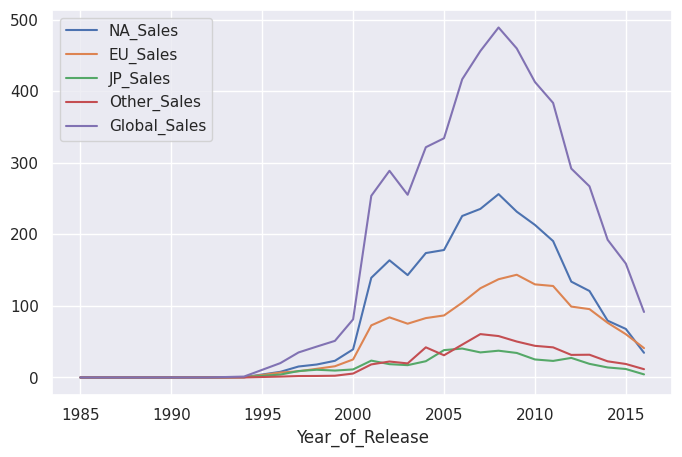

In [12]:
data[[x for x in data.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot()

- The `plot()` is based on `matplotlib`
- Using the `kind` parameter, you can change the type of the plot to, for example, a bar chart

- `matplotlib` is very flexible for customizing plots
- for example, the parameter `rot` is responsible for the rotation angle of ticks on the x-axis

<Axes: xlabel='Year_of_Release'>

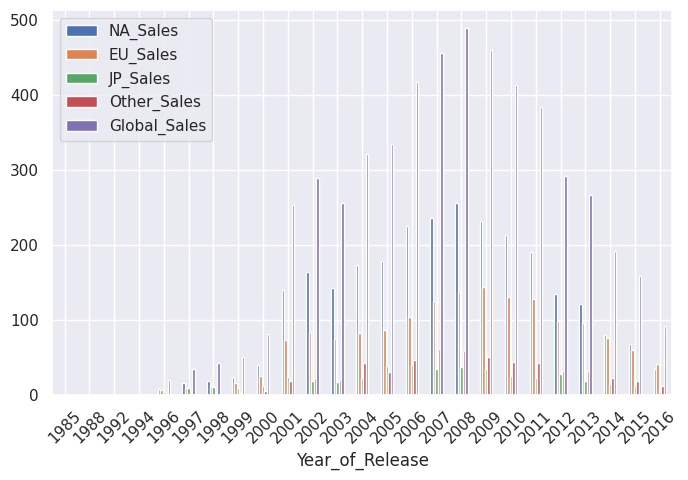

In [13]:
data[[x for x in data.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45)

## Seaborn

- Essentially a higher-level API based on the `matplotlib` library.

### pairplot()

- A pairwise relationships plot creates a matrix of scatter plots by default
- This kind of plot helps us visualize the relationship between different variables in a single output

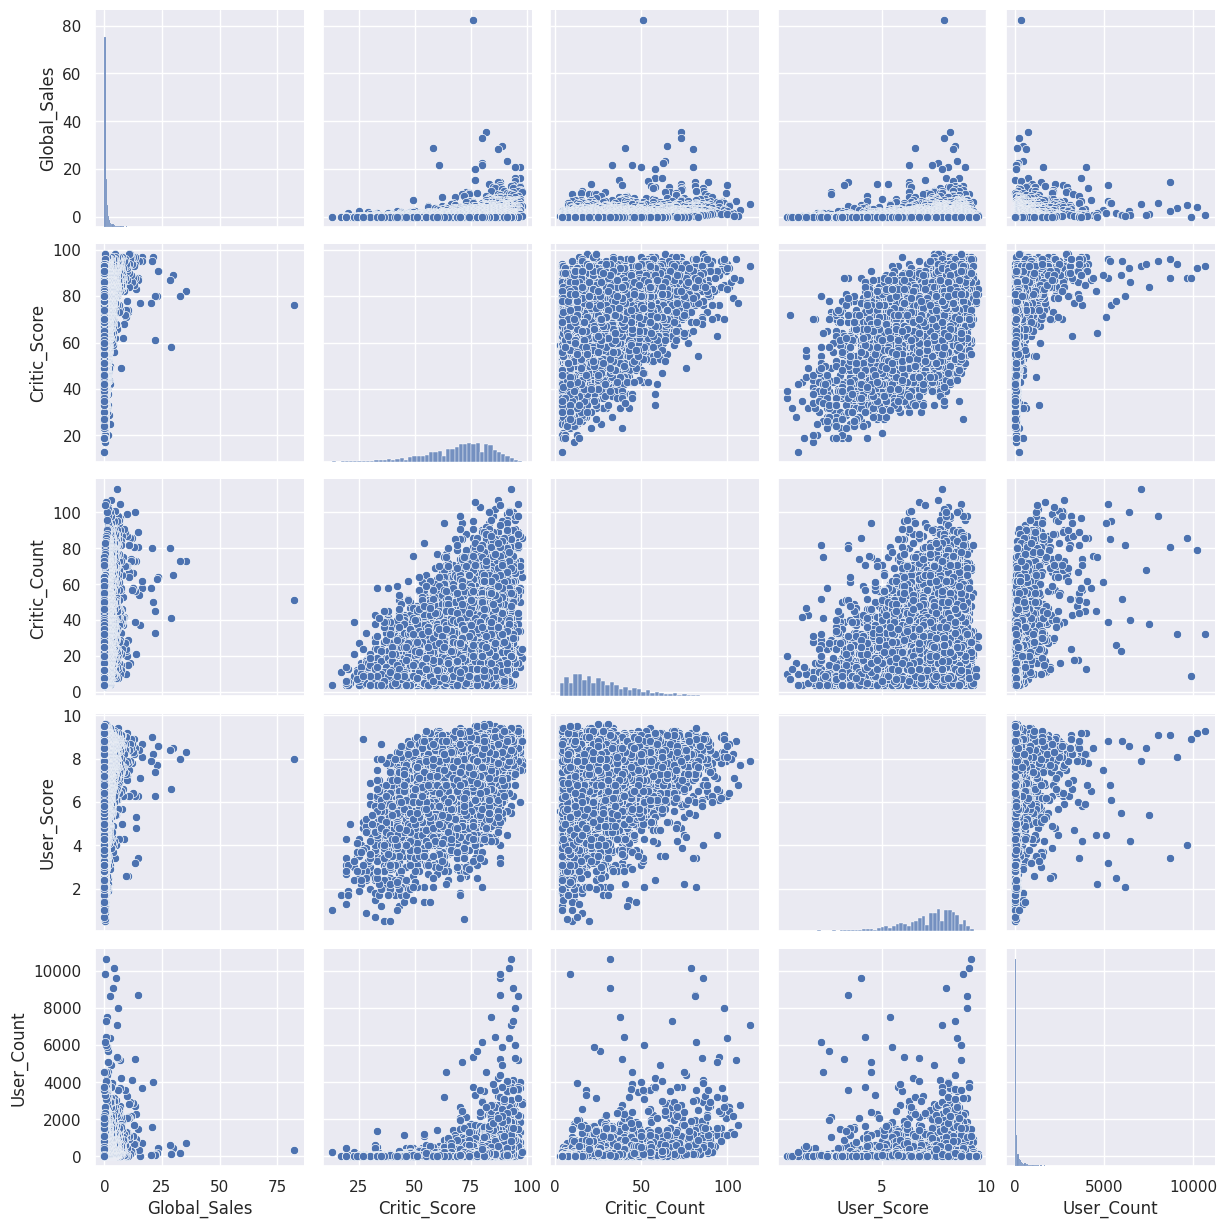

In [14]:
sns.pairplot(
    data[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
)

- As we can see, the distribution histograms lie on the diagonal of the matrix. 
- The remaining charts are scatter plots for the corresponding pairs of features.

### histplot()

- Distribution of observations
- Let's look at the distribution of critics ratings: `Critic_Score`

<Axes: xlabel='Critic_Score', ylabel='Density'>

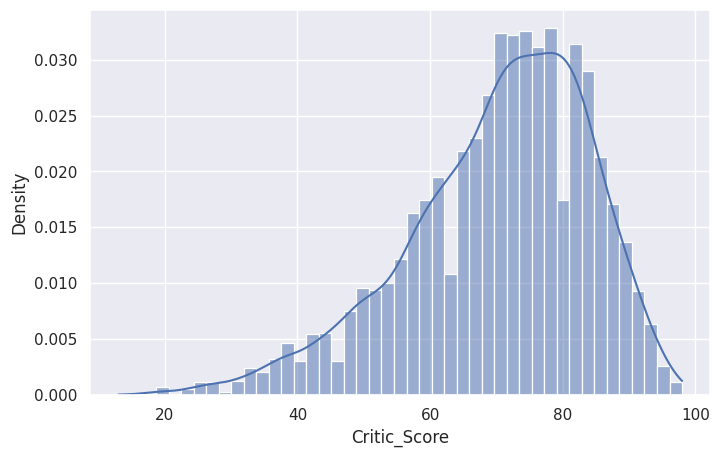

In [16]:
sns.histplot(data["Critic_Score"], kde=True, stat="density")

### jointplot()

- Used to look more closely at the relationship between two numerical variables
- Is a cross between a scatter plto and histogram
- Let's see how the `Critic_Score`and `User_Score` features are related

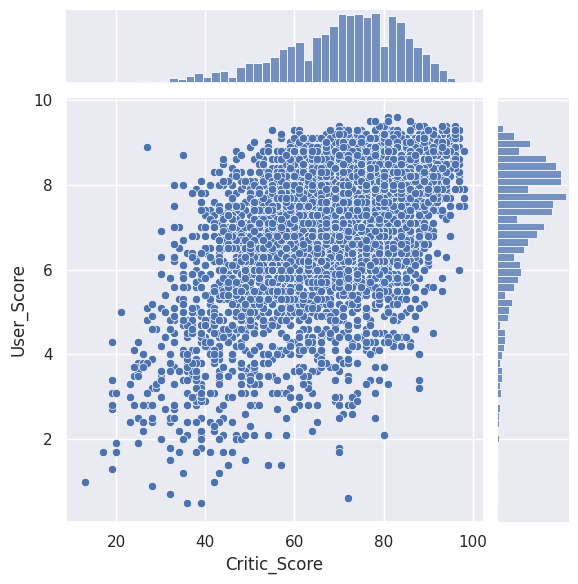

In [17]:
sns.jointplot(x="Critic_Score", y="User_Score", data=data, kind="scatter")

### boxplot()

- Let's compare critics ratings for the top 5 biggest gaming platforms

<Axes: xlabel='Critic_Score', ylabel='Platform'>

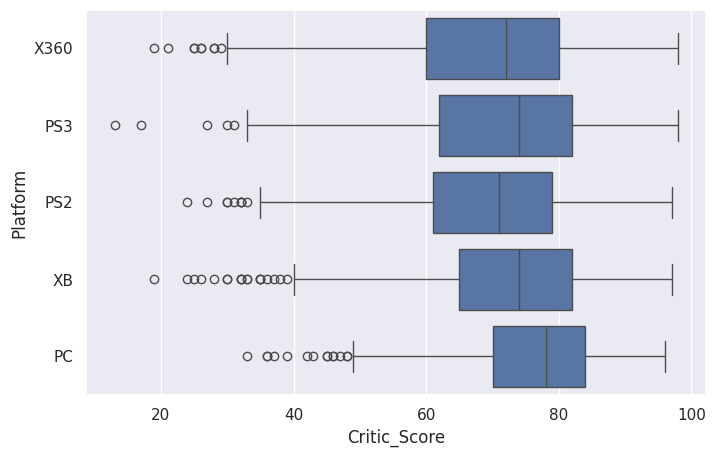

In [18]:
top_platforms = (
    data["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=data[data["Platform"].isin(top_platforms)],
    orient="h",
)

- How to interpret this box plot:
    - The box by itself ilustrates the interquartile spread of the distribution
        - Its length determined by the 25%(Q1) and 75%(Q3) percentiles.
        - The vertical line inside the box marks the median (50%) of the distribution
    - The whiskers are the lines extending from the box.
        - They represent the entire scatter of data points, specifically the points that fall within the interval (Q1-1.5*IQR, Q3+1.5*IQR), where IQR=Q3-Q1 (Interquartile range)
    - The circles out of the whiskers range are the outliers
    

### heatmap()

- Allows us to view the distribution of a numercial variable over two categorical ones
- Let's visualize the total sales of games by genre and gaming patform

<Axes: xlabel='Genre', ylabel='Platform'>

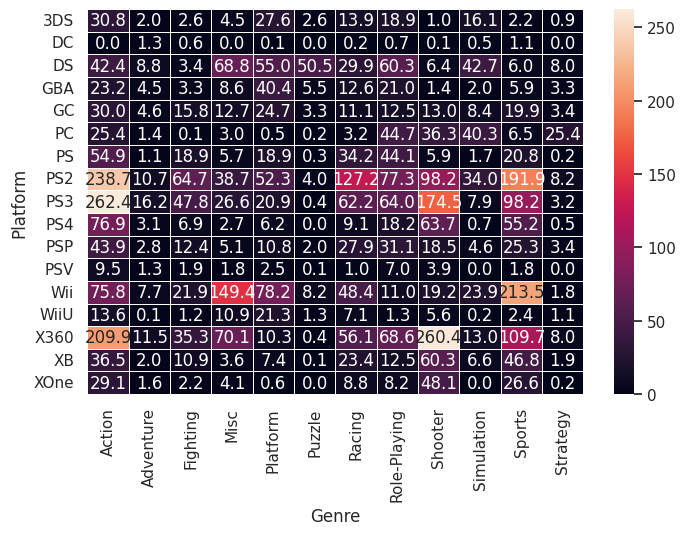

In [20]:
platform_genre_sales = (
    data.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc="sum"
    ).fillna(0).map(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5)

## Plotly

- Open-source library that allows creation of interactive plots within jupyter notebook without having to use javascript

In [ ]:
import plotly